<a href="https://colab.research.google.com/github/natdebandi/hate_speech_ar/blob/main/4_model_comparison_multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP final - reconocimiento de discursos discriminatorios en Twitter

## Comparacion de modelos multi-label

**Natalia Dedandi**




In [2]:
pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.7/360.7 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00


In [3]:
!pip install datasets seaborn
! pip install -U accelerate
! pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 req

In [4]:
import json
from openai import OpenAI
import os
from google.colab import userdata
#seteo la KEY
os.environ['OPENAI_API_KEY'] = userdata.get('openIA_key')




In [5]:
#creo el cliente OPENAI con mi usuario y proyecto
client = OpenAI(
  organization='org-1uHjwiaB3OlPzoxfVzhqOSzs',
  project='proj_2fII7izwVGgYaERNNKhhMx4l',
)

Traigo el data set y quiero aplicarle el clasificador al conjunto de TEST y de eval

In [6]:
from datasets import load_dataset
import pandas as pd

ds1 = load_dataset("piuba-bigdata/contextualized_hate_speech")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/36420 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11343 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/9106 [00:00<?, ? examples/s]

In [7]:
ds1

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 36420
    })
    test: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 11343
    })
    dev: Dataset({
        features: ['id', 'title', 'text', 'context_tweet', 'HATEFUL', 'body', 'CALLS', 'WOMEN', 'LGBTI', 'RACISM', 'CLASS', 'POLITICS', 'DISABLED', 'APPEARANCE', 'CRIMINAL'],
        num_rows: 9106
    })
})

No he logrado aplicar el clasificador múltiple a un conjunto muy grande, sucede un CRASH de memoria
Pero levanto el archivo que guardé oportunamente con la clasificación

In [8]:
# prompt: open file BETO_multi_predictions.csv

df_beto = pd.read_csv('BETO_multi_predictions.csv')


In [17]:
for column in df_beto.columns:
  if "_y" in column:
    new_column = column.replace("_y", "_beto")
    df_beto.rename(columns={column: new_column}, inplace=True)

In [18]:
df_beto[20:30]

,id,text,HATEFUL_x,CALLS_x,WOMEN_x,LGBTI_x,RACISM_x,CLASS_x,POLITICS_x,DISABLED_x,...,HATEFUL_beto,CALLS_beto,WOMEN_beto,LGBTI_beto,RACISM_beto,CLASS_beto,POLITICS_beto,DISABLED_beto,APPEARANCE_beto,CRIMINAL_beto
20,397723,@usuario Votó eso.,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,397724,"@usuario Para lo poco que hacía,",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,397725,@usuario Estashi!!!,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,397726,@usuario @usuario El conchero...después que vo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,397727,@usuario Negra cabeza,1,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
25,397728,@usuario 🤣🤣🤣a comer polenta genia del voto,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,397729,@usuario No siento pena \nFuiste Voto K ?\nBan...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,397730,@usuario Otra chorra K,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,397731,@usuario Otro logro más de @usuario,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,397732,@usuario Pero vota kirchnerismo,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Levanto el archivo con la clasificación MULTI-LABEL de GPT 4 mini

In [10]:
df_GPT4 = pd.read_csv('GPT4_multi_results.csv')


In [11]:
df_GPT4[20:30]

,id,sentiment_gpt,CALLS_pred,WOMEN_pred,LGBTI_pred,RACISM_pred,CLASS_pred,POLITICS_pred,DISABLED_pred,APPEARANCE_pred,CRIMINAL_pred
20,397723,NOT HATEFUL,0,0,0,0,0,0,0,0,0
21,397724,NOT HATEFUL,0,0,0,0,0,0,0,0,0
22,397725,NOT HATEFUL,0,0,0,0,0,0,0,0,0
23,397726,NOT HATEFUL,0,0,0,0,0,0,0,0,0
24,397727,RACISM,0,0,0,1,0,0,0,0,0
25,397728,NOT HATEFUL,0,0,0,0,0,0,0,0,0
26,397729,NOT HATEFUL,0,0,0,0,0,0,0,0,0
27,397730,NOT HATEFUL,0,0,0,0,0,0,0,0,0
28,397731,NOT HATEFUL,0,0,0,0,0,0,0,0,0
29,397732,POLITICS,0,0,0,0,0,1,0,0,0


In [12]:
for column in df_GPT4.columns:
  if "_pred" in column:
    new_column = column.replace("_pred", "_gpt4")
    df_GPT4.rename(columns={column: new_column}, inplace=True)


In [13]:
df_GPT4[20:30]

,id,sentiment_gpt,CALLS_gpt4,WOMEN_gpt4,LGBTI_gpt4,RACISM_gpt4,CLASS_gpt4,POLITICS_gpt4,DISABLED_gpt4,APPEARANCE_gpt4,CRIMINAL_gpt4
20,397723,NOT HATEFUL,0,0,0,0,0,0,0,0,0
21,397724,NOT HATEFUL,0,0,0,0,0,0,0,0,0
22,397725,NOT HATEFUL,0,0,0,0,0,0,0,0,0
23,397726,NOT HATEFUL,0,0,0,0,0,0,0,0,0
24,397727,RACISM,0,0,0,1,0,0,0,0,0
25,397728,NOT HATEFUL,0,0,0,0,0,0,0,0,0
26,397729,NOT HATEFUL,0,0,0,0,0,0,0,0,0
27,397730,NOT HATEFUL,0,0,0,0,0,0,0,0,0
28,397731,NOT HATEFUL,0,0,0,0,0,0,0,0,0
29,397732,POLITICS,0,0,0,0,0,1,0,0,0


Ahora levanto el archivo de resultados del GPT 3 con finetuning

In [19]:
df_GPT3 = pd.read_csv('GPT3_FT_results.csv')


In [21]:
for column in df_GPT3.columns:
  if "_pred" in column:
    new_column = column.replace("_pred", "_gpt3")
    df_GPT3.rename(columns={column: new_column}, inplace=True)

In [22]:
df_GPT3[20:30]

,id,sentiment_gpt,CALLS_gpt3,WOMEN_gpt3,LGBTI_gpt3,RACISM_gpt3,CLASS_gpt3,POLITICS_gpt3,DISABLED_gpt3,APPEARANCE_gpt3,CRIMINAL_gpt3,HATEFUL_gpt3
20,397723,NaN,0,0,0,0,0,0,0,0,0,0
21,397724,NaN,0,0,0,0,0,0,0,0,0,0
22,397725,NaN,0,0,0,0,0,0,0,0,0,0
23,397726,NaN,0,0,0,0,0,0,0,0,0,0
24,397727,RACISM,0,0,0,1,0,0,0,0,0,1
25,397728,NaN,0,0,0,0,0,0,0,0,0,0
26,397729,NaN,0,0,0,0,0,0,0,0,0,0
27,397730,NaN,0,0,0,0,0,0,0,0,0,0
28,397731,NaN,0,0,0,0,0,0,0,0,0,0
29,397732,NaN,0,0,0,0,0,0,0,0,0,0


In [23]:

df_merged = pd.merge(df_GPT3, df_GPT4, on='id', how='inner')
df_merged = pd.merge(df_merged, df_beto, on='id', how='inner')


In [24]:
df_merged[20:30]

,id,sentiment_gpt_x,CALLS_gpt3,WOMEN_gpt3,LGBTI_gpt3,RACISM_gpt3,CLASS_gpt3,POLITICS_gpt3,DISABLED_gpt3,APPEARANCE_gpt3,...,HATEFUL_beto,CALLS_beto,WOMEN_beto,LGBTI_beto,RACISM_beto,CLASS_beto,POLITICS_beto,DISABLED_beto,APPEARANCE_beto,CRIMINAL_beto
20,397723,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,397724,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,397725,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,397726,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,397727,RACISM,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
25,397728,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,397729,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,397730,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,397731,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,397732,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


** Analizo cada una de las variables**

WOMEN

In [25]:
label='WOMEN'
df_analysis = [col for col in df_merged.columns if col.startswith(label)]
df_analysis = df_merged[['id', 'text'] + df_analysis]


In [26]:
df_analysis[0:10]

,id,text,WOMEN_gpt3,WOMEN_gpt4,WOMEN_x,WOMEN_beto
0,397703,@usuario Ojalá se funda y cague de hambre,0,0,0,0
1,397704,@usuario Faltó que se enganchó al hijo de sofo...,0,0,1,0
2,397705,"@usuario y bue, que le vaya a llorar a Cristin...",0,0,0,0
3,397706,@usuario @usuario Jodete. Macri te hizo conoce...,0,0,0,0
4,397707,"@usuario Que se joda, es su gobierno el que el...",0,0,0,0
5,397708,"@usuario Jajaajajajaaja que lástima!!! Anda, b...",0,0,0,0
6,397709,@usuario Que se joda,0,0,0,0
7,397710,@usuario SEGUI VOTANDO AL PERONISMO PELOTUDA,0,0,0,0
8,397711,@usuario Paaaaaaaaaaaaabreeeee!_shoro😭😭🤧,0,0,0,0
9,397712,@usuario TUGO,0,0,0,0


<ipython-input-31-373649c3ac08>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_analysis, x=label+'_x', y=label+'_beto', inner='stick', palette='Dark2', ax=axes[0])
<ipython-input-31-373649c3ac08>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_analysis, x=label+'_x', y=label+'_gpt4', inner='stick', palette='Dark2', ax=axes[1])
<ipython-input-31-373649c3ac08>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_analysis, x=label+'_x', y=label+'_gpt3', inner='stick', palette='Dark2', ax=axes[2])


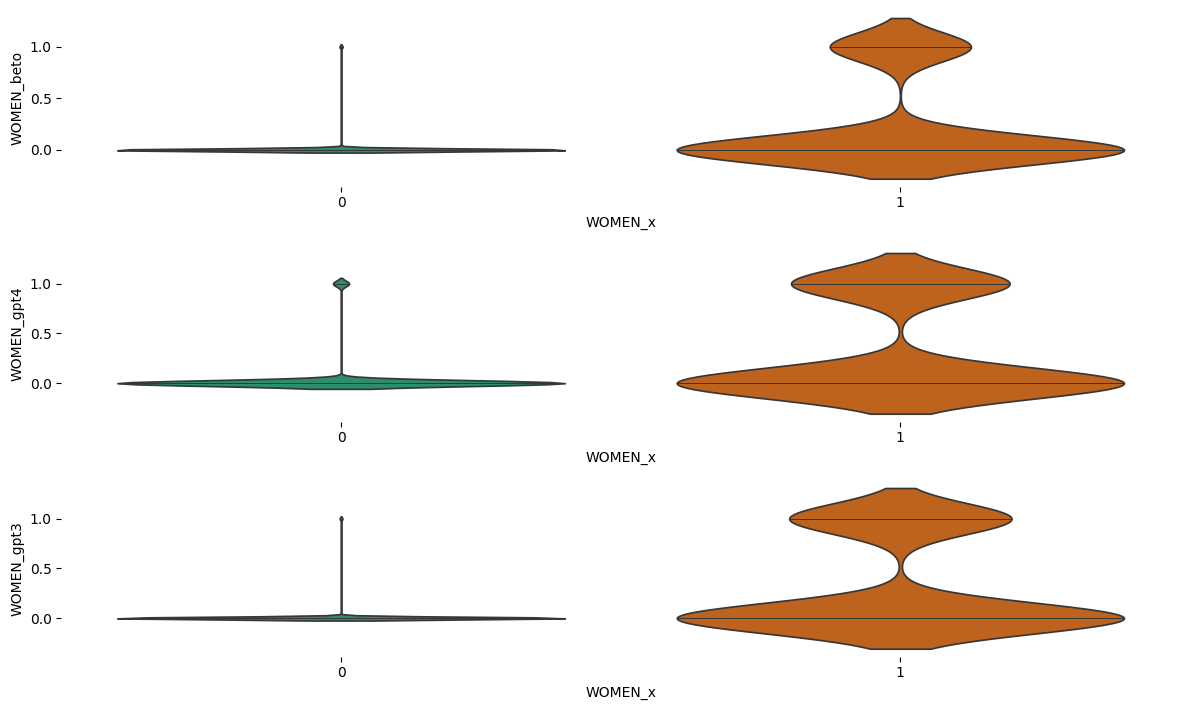

In [31]:
# Create a grid of violin plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 1.2 * 3 * len(df_analysis[label+'_x'].unique())))

sns.violinplot(df_analysis, x=label+'_x', y=label+'_beto', inner='stick', palette='Dark2', ax=axes[0])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[0])

sns.violinplot(df_analysis, x=label+'_x', y=label+'_gpt4', inner='stick', palette='Dark2', ax=axes[1])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[1])

sns.violinplot(df_analysis, x=label+'_x', y=label+'_gpt3', inner='stick', palette='Dark2', ax=axes[2])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[2])

plt.tight_layout()
plt.show()

In [33]:

examples=df_analysis[(df_analysis[label+'_x'] == 1) | (df_analysis[label+'_beto'] == 1) | (df_analysis[label+'_gpt3'] == 1) | (df_analysis[label+'_gpt4'] == 1)].head(15)


In [34]:
examples

,id,text,WOMEN_gpt3,WOMEN_gpt4,WOMEN_x,WOMEN_beto
1,397704,@usuario Faltó que se enganchó al hijo de sofo...,0,0,1,0
24,397727,@usuario Negra cabeza,0,0,1,0
36,397739,@usuario Con toda la que le sacó a Diego Romay...,0,1,0,0
171,376429,@usuario A que telma fardín hace de violada y ...,0,0,1,0
191,376449,@usuario Salvó las feminazis no va a ir nadie ...,1,1,1,1
192,376450,@usuario Pobres tontas! Ni idea tienen del suf...,0,1,0,0
194,376452,@usuario Mujeres infumables!,0,1,0,0
205,376463,@usuario mujeres CHORRAS como cri$tina!!,0,1,0,0
207,376465,@usuario Dejen de joder con esas decadentes; ...,1,1,0,0
209,376467,@usuario Otra vez a mantener estas vagas con l...,1,1,0,0


In [36]:
examples.to_csv('examples_WOMEN_predictions.csv', index=False)


In [37]:
label='RACISM'

In [38]:

df_analysis = [col for col in df_merged.columns if col.startswith(label)]
df_analysis = df_merged[['id', 'text'] + df_analysis]

<ipython-input-39-373649c3ac08>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_analysis, x=label+'_x', y=label+'_beto', inner='stick', palette='Dark2', ax=axes[0])
<ipython-input-39-373649c3ac08>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_analysis, x=label+'_x', y=label+'_gpt4', inner='stick', palette='Dark2', ax=axes[1])
<ipython-input-39-373649c3ac08>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_analysis, x=label+'_x', y=label+'_gpt3', inner='stick', palette='Dark2', ax=axes[2])


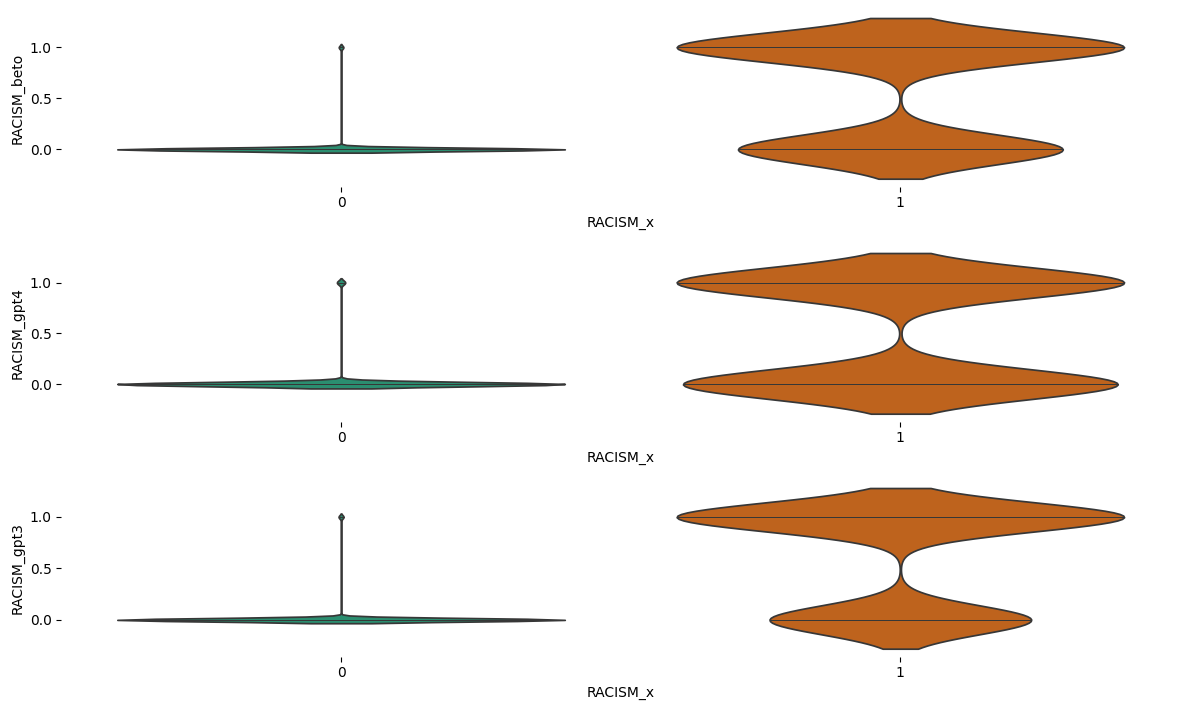

In [39]:
# Create a grid of violin plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 1.2 * 3 * len(df_analysis[label+'_x'].unique())))

sns.violinplot(df_analysis, x=label+'_x', y=label+'_beto', inner='stick', palette='Dark2', ax=axes[0])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[0])

sns.violinplot(df_analysis, x=label+'_x', y=label+'_gpt4', inner='stick', palette='Dark2', ax=axes[1])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[1])

sns.violinplot(df_analysis, x=label+'_x', y=label+'_gpt3', inner='stick', palette='Dark2', ax=axes[2])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[2])

plt.tight_layout()
plt.show()

In [41]:

examples=df_analysis[(df_analysis[label+'_x'] == 1) | (df_analysis[label+'_beto'] == 1) | (df_analysis[label+'_gpt3'] == 1) | (df_analysis[label+'_gpt4'] == 1)].sample(15)


In [42]:
examples.to_csv('examples_racism_predictions.csv', index=False)

In [45]:
label='CALLS'

In [46]:
df_analysis = [col for col in df_merged.columns if col.startswith(label)]
df_analysis = df_merged[['id', 'text'] + df_analysis]

<ipython-input-47-8e79a2e6f241>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_analysis, x=label+'_x', y=label+'_beto', inner='stick', palette='Dark2', ax=axes[0])
<ipython-input-47-8e79a2e6f241>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_analysis, x=label+'_x', y=label+'_gpt4', inner='stick', palette='Dark2', ax=axes[1])
<ipython-input-47-8e79a2e6f241>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_analysis, x=label+'_x', y=label+'_gpt3', inner='stick', palette='Dark2', ax=axes[2])


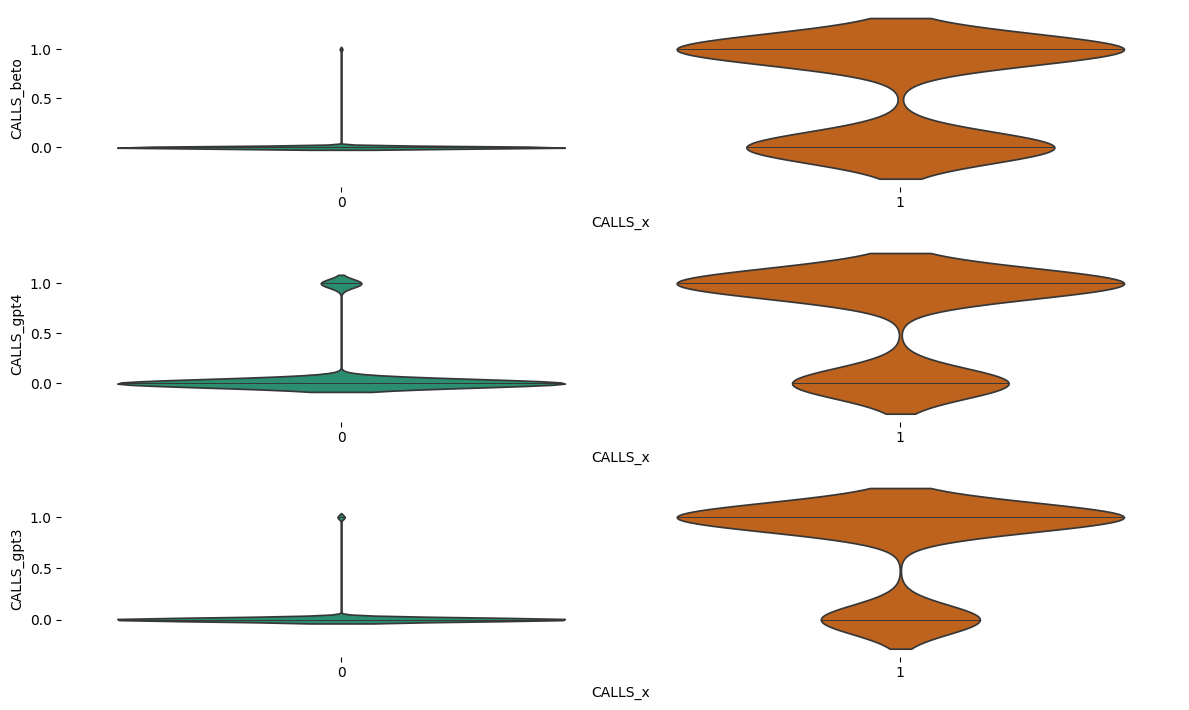

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 1.2 * 3 * len(df_analysis[label+'_x'].unique())))

sns.violinplot(df_analysis, x=label+'_x', y=label+'_beto', inner='stick', palette='Dark2', ax=axes[0])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[0])

sns.violinplot(df_analysis, x=label+'_x', y=label+'_gpt4', inner='stick', palette='Dark2', ax=axes[1])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[1])

sns.violinplot(df_analysis, x=label+'_x', y=label+'_gpt3', inner='stick', palette='Dark2', ax=axes[2])
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[2])

plt.tight_layout()
plt.show()

In [50]:
examples=df_analysis[(df_analysis[label+'_x'] == 1) | (df_analysis[label+'_beto'] == 1) | (df_analysis[label+'_gpt3'] == 1) | (df_analysis[label+'_gpt4'] == 1)].sample(15)

In [51]:
examples

,id,text,CALLS_gpt3,CALLS_gpt4,CALLS_x,CALLS_beto
10198,343665,@usuario Si tenes tanto miedo Larroque quéda...,0,1,0,0
7921,377839,@usuario Si salís a ROBAR corres el riesgo que...,0,1,0,0
432,390656,@usuario @usuario q no venga a este cancer de ...,0,1,0,0
558,396229,"@usuario dale Abascal, salí a putearlo",0,1,0,0
454,389683,@usuario Una bala perdida por favor!!,1,1,1,1
8249,379431,"@usuario Esta perfecto, pero se tienen que ir.",1,0,0,0
9578,398694,@usuario Esta señora gagá va a aportar mas mue...,0,1,0,0
4774,385348,"@usuario Si tanto odias a tu país , sería buen...",0,1,0,0
6427,352882,@usuario Corchaso directo maten antes de que ...,1,1,1,0
10847,374352,@usuario Esta perfecto si atacan a un policía ...,0,1,0,0


In [52]:
examples.to_csv('examples_calls_predictions.csv', index=False)